In [37]:
from navstack_gym.base import TreasureChestEnv
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

In [38]:
env = TreasureChestEnv()
env.reset(scene_obstacle_count=13)

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [45]:
room = env.scener.room_config
pose = env.agent_current_position
env_size = env.map_resolition*env.map_size/2

/home/tagokeniot/hypo_workspace/hypo-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/home/tagokeniot/hypo_workspace/hypo-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/tagokeniot/hypo_workspace/hypo-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/tmp/ipykernel_806760/941950016.py:35: UserWarning: Matplotlib is currently usin

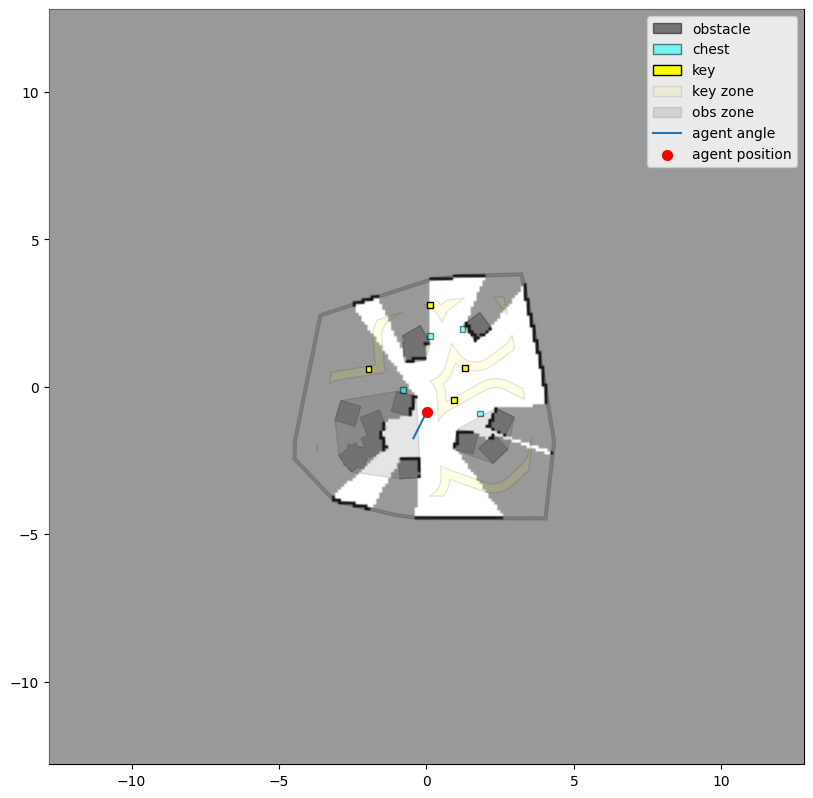

In [70]:
fig = plt.figure(0, figsize=(10,10), dpi=100)
ax = fig.add_subplot(111)
plt.xlim(-env_size, env_size)
plt.ylim(-env_size, env_size)

wall = unary_union(room.get_polygons(room.tag_wall))
obstacles = unary_union(room.get_polygons(room.tag_obstacle))
chests = unary_union(room.get_polygons(room.tag_target))
keys = unary_union(room.get_polygons(room.tag_key))
obs_zones = unary_union(room.obstacle_hulls)
key_zones = unary_union(room.key_placing_area)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=3, label="obstacle"))
ax.add_patch(PolygonPatch(chests, fc='cyan', alpha=0.5, zorder=4, label='chest'))
ax.add_patch(PolygonPatch(keys, fc='yellow', alpha=1, zorder=6, label='key'))
ax.add_patch(PolygonPatch(key_zones, fc='yellow', alpha=0.1, zorder=5, label='key zone'))
ax.add_patch(PolygonPatch(obs_zones, fc='black', alpha=0.1, zorder=4, label='obs zone'))

r = 1
angle_x = pose[0] + np.cos(pose[2])*r
angle_y = pose[1] + np.sin(pose[2])*r
ax.plot([pose[0],angle_x], [pose[1],angle_y], label='agent angle', zorder=4)

ax.scatter(*pose[:2], s=50, color='red', label='agent position', zorder=4)

map_img = np.copy(env.actioner.occupancy_map.T[::-1,:])
map_img[map_img==-1] = 25
map_img[map_img==0] = 50
map_img[map_img==100] = 0

ax.imshow(map_img, cmap='gray', alpha=0.8, extent=(-env_size,env_size,-env_size,env_size), zorder=3)

ax.legend()
fig.show()